# Метрические алгоритмы

## Теоретическое задание

### Задача 1

Может ли в методе $k$ ближайших соседей при $k=4$ получиться лучший результат, чем при
$k=3$? Отказы от классификации тоже считать ошибками.

## Практическое задание

Сгенерируйте и визуализируйте ряд двумерных обучающих выборок (не менее 3), разделенных на два класса и образующих фигуру "пила" (как в примере). Выборки должны быть иметь одинаковое количество объектов, но отличаться высотой и шириной зубцов "пилы". Для каждой выборки :

1) Посчитайте первых 5 профилей компактности.

2) Посчитайте CCV для алгоритма одного ближайшего соседа и длин контрольной выборки от 1 до 5

3) Посчитайте функционал скользящего контроля при разбиении методом KFold.
    Постройте график зависимости величины профиля компактности от номера (То есть зависимость $P(m)$ от $m$).

4) Постройте график зависимости величины CCV для алгоритма одного ближайшего соседа от длины контрольной выборки.

 5) Постройте график зависимости величины CCV от количества рассматриваемых соседей при длине контрольной выборки равной 5.

### Пример

In [17]:
from sklearn import cross_validation, ensemble, grid_search, linear_model, metrics, pipeline, preprocessing

import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
def plot_model_data(blue_data, red_data):
    plt.figure(figsize=(10, 10))
    plt.scatter(blue_data[:,0], blue_data[:,1], color="blue", alpha=0.3)
    plt.scatter(red_data[:,0], red_data[:,1], color="red", alpha=0.3)
    plt.show()

In [19]:
def generate_saw(point_count, width, height):
    points = np.random.rand(point_count, 2)
    subsaw_index = (points[:, 0] / width).astype(int)
    unit = points[:, 0] - subsaw_index * width
    below_index = points[:, 1] < 0.5 - 2.0 * (subsaw_index % 2 - 0.5) * (unit * 2 * height / width - height)
    blue_data = points[below_index, :]
    red_data = points[~below_index, :]
    return blue_data, red_data

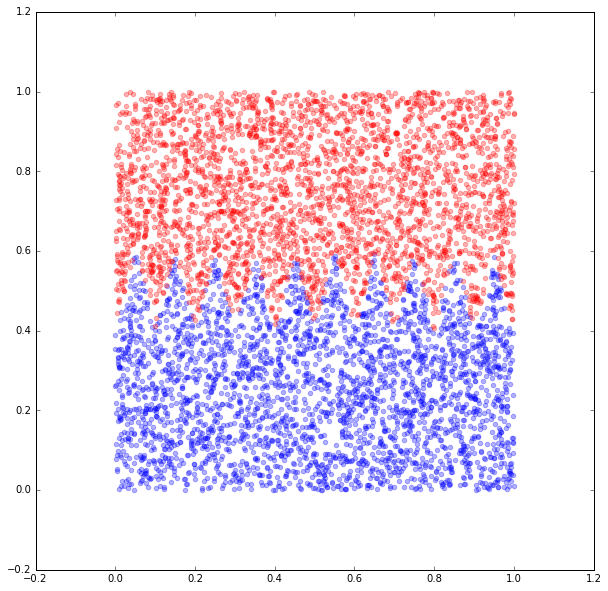

In [20]:
blue_data, red_data = generate_saw(6000, 0.05, 0.1)
plot_model_data(blue_data, red_data)

# Линейные алгоритмы

## Теоретическое задание

### Задача 1

Являются ли ядрами:

  a) $K(x,y) = exp(2<x,y>)+<y+x,3y+x>$; b) $K(x,y) = ch(<x,y>)$+$3sh(<x,y>)$?

### Задача 2

Для какого алгоритма классификации функционал аппроксимированного риска будет при-
нимать большее значение на обучающей выборке: для построенного с регуляризацией или
без нее? Почему?

## Практическое задание

1) Считайте данные из файла bike_sharing_train.csv в pandas.DataFrame

2) Выведите небольную часть получившегося DataFrame на экран, посмотрите на данные

Проанализируйте описание данных:

***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***count*** - number of total rentals

3) Разделите данные на обучающую и тестовую выборки. Данные имеют временную приявязку, поэтому их нужно разделить по времени: в тестовую выборку нужно выделить объекты из более позднего временного промежутка, по сравнению с обучающей выборкой. Размер тестовой выборки выеберите самостоятельно.

4) В наборе данных доступны вещественные, бинарные и категориальные признаки, однако со всеми из них можно работать как с вещественными признаками, давайте будем делать именно так. Согласно пункту 10 из раздела "Анализ и визуализация данных" признаки имеют разный маштаб. Отбмасштабируйте признаки с помощью преобразования preprocessing.StandardScaler. 

5.1) Обучите модели linear_model.SGDRegressor и linear_model.Lasso. Оцените качество модели с помощью метрики MAE (metrics.mean_absolute_error). Сравните качество на обучении и на тесте. 

5.2) Проанализируйте веса регрессии. Какие выводы можно сделать? Какие признаки внесли наибольший вклад в модель?

6) Придумайте и сгенерируйте несколько дополнительных признаков на основе существующего набора данных.

7) Обучите одну из моделей linear_model.SGDRegressor или linear_model.Lasso на получившемся наборе признаков, не забыв предварительно их отмасштабировать. Изменилось ли качество классификации? С какими весами Ваши признаки вошли в модель? Можно ли сделать вывод о том, что от добавления новых признаков качество модели улучшилось?

8) Теперь давайте по-разному обработаем признаки разного типа. Для того, чтобы удобно работать с набором преобразований данных будем использовать pipeline.Pipeline. Ознакомьтесь с примером ниже: а рамках примера строится piplene из двух шагов: обработка данных и обучение модели. В рамках первого шага сначала обрабатываются бинарные данные (остаются без изменений), а потом -  вещественные признаки (масштабируются). На втором шаге строится модель регрессии.

9) На основе примера выше постройте pipeline, который обрабатывает 3 типа признаков: бинарные, вещественные (делаем масштабирование) и категориальные (обрабатываем данные с помощью метода One Hot Encoding - preprocessing.OneHotEncoder). Обучите получившуюся цепочку и оцените качество.

In [ ]:
# Пример:
# train_data, train_labels - DataFrame с обучающей выборкой и значения целевой функции на обучении
# test_data, test_labels - DataFrame с тестовой выборкой и значения целевой функции на тесте

# Создание индекса для бинарных признаков
binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)

# Создание индекса для вещественных признаков
numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'season', 'weather']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)

# Создание модели регресии
model = linear_model.SGDRegressor(random_state = 0)

# Объявление pipline -  цепочки преобразования данных, начиная от обработки данных в зависимости от их типа, и 
# заканчивая обучением модели. 

estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler())            
                        ])),

        ])),
    ('model_fitting', model)
    ]
)

# С цепочкой можно работать как с одиночным преобразованием, в частности вызывать методы fit и predict 
estimator.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, estimator.predict(test_data))

10) Сделайте выводы: как обработка признаков повлияла на качество модели?

11) Продолжаем работать с pipeline. Подбрети параметры модели с помощью случайного поиска по сетке.

12)  Сделайте выводы: как подбор параметров повлиял на качество модели?

13) Постройте следующий график: отобразите объекты тестовой и обучающей выборок (объекты из обучения и теста должны отображаться разными цветами) в координатах целевая функция/оценка целевой функции с помощью псостроенной модели. 

14) Какие выводы можно сделать на основе построенного графика? Насколько хорошую модель мы получили?

# Логические алгоритмы

## Теоретическое задание

Пусть $P$,$N$ — число своих и чужих во всей выборке, $P+N=l$. $p$,$n$ — число классифицируемых
своими и чужими закономерностью $R$.

### Задача 1

#### Энтропийный кртерий информативности:
  

$IGain(p,n)=H(y)-H(y|R)=h\bigl(\frac{P}{l}\bigr)  -\frac{p+n}{l}h\bigl(\frac{p}{p+n}\bigr)+\frac{l-p-n}{l}h\bigl(\frac{P-p}{l-p-n}\bigr)
   $,

где $h(q)=-q\log_2 q - (1-q)\log_2(1-q)$

#### Статистический критерий информативности

$IStat(p,n)=-\frac{1}{l}\log_2\frac{C^n_NC^p_P}{C^{p+n}_{P+N}}$

Покажите асимптотическую эквивалентность энтропийного и статистического критериев информативности.

### Задача 2

Какая стратегия поведения в листьях решающего дерева приводит к меньшей вероятности
ошибки: отвечать тот класс, который преобладает в листе, или отвечать случайно с тем же рас-
пределением классов, что и в листе?

## Практическое задание

3) Обучите модель случайный лес (ensemble.RandomForestRegressor) и оцените качество получившейся модели на обучении и на тесте. 

4) Проанализируйте важность признаков с помощью метода feature_importances_. Какие признаки оказали наибольший вклад в модель? Соответсвует ли это Вашим предположениям о вкладе признаков?

5) Постройте следующий график: отобразите объекты тестовой и обучающей выборок (объекты из обучения и теста должны отображаться разными цветами) в координатах целевая функция/оценка целевой функции с помощью псостроенной модели. 

6) Сравните график, полученный на предыдущем шаге с соответсвующим графиком для линейной модели. Какие выводы можно сделать?